# 1 - Prepare the data <a id='p1'></a>

Original challenge data, as found at https://www.crowdai.org/challenges/lifeclef-2019-bird-recognition.

In [1]:
! tree /home/jul/data/birdclef2019/ -L 2 -I phaunos

/home/jul/data/birdclef2019/
├── custom_subsets
├── train
│   ├── additional_metadata
│   ├── audio
│   ├── BirdCLEF2019_Species_Codes_List.csv
│   ├── metadata
│   └── Pipfile
└── val
    ├── audio
    ├── BirdCLEF2019_Species_Codes_List.csv
    ├── metadata
    ├── Pipfile
    ├── script
    ├── SWAMP_Filename_Description.txt
    ├── SWAMP_Recording_Locations.png
    └── SWIFT_Recording_Unit.jpg

9 directories, 7 files


All additional data will be saved in directories called "phaunos".
Audio data is resampled to 22050 Hz for faster prototyping:

In [2]:
! tree /home/jul/data/birdclef2019/train/phaunos/ -L 1 -I annotations
! tree /home/jul/data/birdclef2019/val/phaunos/ -L 1 -I annotations

/home/jul/data/birdclef2019/train/phaunos/
└── audio_wav_22050hz

1 directory, 0 files
/home/jul/data/birdclef2019/val/phaunos/
└── audio_wav_22050hz

1 directory, 0 files


## 1.1 - Generate annotation files (see [here](https://github.com/phaunos/phaunos_ml/blob/7fe9a4d07821a3ae0a5cdc353dc27fd332c5132c/phaunos_ml/utils/annotation_utils.py))

In [3]:
%load_ext autoreload
%autoreload 2
from challenge_utils.birdclef2019_utils import get_class_list, generate_train_ann_files, generate_val_ann_files

In [4]:
class_list = get_class_list('/home/jul/data/birdclef2019/train/BirdCLEF2019_Species_Codes_List.csv')

In [5]:
print(class_list)

['acafly', 'agitit1', 'aldfly', 'amakin1', 'amebit', 'amecro', 'amegfi', 'amekes', 'ameoys', 'amepip', 'amered', 'amerob', 'amewig', 'amewoo', 'amgplo', 'amtspa', 'anbtyr1', 'andeme1', 'andgua1', 'andsis1', 'anhing', 'anpowl1', 'aplfal', 'asctap1', 'azaspi1', 'babtan1', 'babwar', 'babwre1', 'bacant1', 'bacant2', 'bafibi1', 'bahtan1', 'baisan', 'baleag', 'balori', 'banana', 'banswa', 'barant1', 'barpuf1', 'barswa', 'batfal1', 'batgua1', 'batpig1', 'batsee1', 'bawswa1', 'bawwar', 'baymac', 'baywre1', 'bbctyr1', 'bbmtan1', 'bbmtou1', 'bbwduc', 'bcbeag1', 'bcmtan1', 'bcnher', 'belkin1', 'bhtfly1', 'bicant2', 'bicwre1', 'bkbcuc', 'bkbplo', 'bkbwar', 'bkcchi', 'bkcdon', 'bkfgra', 'bkmtou1', 'bknsti', 'bkpwar', 'blaant1', 'blbant1', 'blbcon1', 'blbgra1', 'blbgro2', 'blbthr1', 'blbwre1', 'blcant4', 'blchaw1', 'blchem1', 'blchum1', 'blcjay1', 'blcjay2', 'blcman1', 'blctan2', 'blctit1', 'blctyr1', 'blcwar2', 'blfant1', 'blftan1', 'blgdov1', 'blheag1', 'blhhem1', 'blhpar1', 'blhtan1', 'blkflo1', 

In [6]:
generate_train_ann_files(
    '/home/jul/data/birdclef2019/train/phaunos/audio_wav_22050hz/',
    '/home/jul/data/birdclef2019/train/metadata/',
    '/home/jul/data/birdclef2019/train/phaunos/annotations/',
    class_list)

In [7]:
# Note: some val metadata is empty (no species)
# + some is not clean: wrong time parameters or duplicates
generate_val_ann_files(
    '/home/jul/data/birdclef2019/val/phaunos/audio_wav_22050hz/',
    '/home/jul/data/birdclef2019/val/metadata/',
    '/home/jul/data/birdclef2019/val/phaunos/annotations/',
    class_list)

File /home/jul/data/birdclef2019/val/metadata/./LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49870.json: Wrong time parameters: start_time must be greater than or equal to 0 and end_time must be greater than start_time (got 191 and 2))
File /home/jul/data/birdclef2019/val/metadata/./LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49870.json: Wrong time parameters: start_time must be greater than or equal to 0 and end_time must be greater than start_time (got 191 and 2))
File /home/jul/data/birdclef2019/val/metadata/./LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49888.json: Wrong time parameters: start_time must be greater than or equal to 0 and end_time must be greater than start_time (got 306 and 12))
File /home/jul/data/birdclef2019/val/metadata/./LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49888.json: Wrong time parameters: start_time must be greater than or equal to 0 and end_time must be greater than start_time (got 306 and 12))


Annotation file contains all annotations of a given audio file. Each line represent a region and one or more label ids:
    start_time,end_time(-1 if the annotation is for the whole audio file, as in our case),label_ids (joined by '#'):

In [8]:
!head -5 /home/jul/data/birdclef2019/train/phaunos/annotations/amebit/* | head -8

==> /home/jul/data/birdclef2019/train/phaunos/annotations/amebit/XC1133.ann <==
0.000,-1.000,4

==> /home/jul/data/birdclef2019/train/phaunos/annotations/amebit/XC127371.ann <==
0.000,-1.000,4

==> /home/jul/data/birdclef2019/train/phaunos/annotations/amebit/XC130058.ann <==
0.000,-1.000,4
head: write error: Broken pipe


In [9]:
# Note: metadata is not clean: wrong time parameters or duplicates
!head -5 /home/jul/data/birdclef2019/val/phaunos/annotations/* | head -20

==> /home/jul/data/birdclef2019/val/phaunos/annotations/LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49849.ann <==
7.000,8.000,581
7.000,8.000,581
13.000,15.000,581
13.000,15.000,581
21.000,23.000,581

==> /home/jul/data/birdclef2019/val/phaunos/annotations/LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49870.ann <==
1.000,3.000,81
1.000,3.000,81
2.000,4.000,81
2.000,4.000,81
3.000,5.000,81

==> /home/jul/data/birdclef2019/val/phaunos/annotations/LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49888.ann <==
14.000,16.000,150
14.000,16.000,150
21.000,23.000,150
21.000,23.000,150
23.000,26.000,150
head: write error: Broken pipe


## 1.2 - Create a subset for fast prototyping

In [10]:
import numpy as np
from phaunos_ml.utils.dataset_utils import create_subset, dataset_stat_per_file

In [11]:
# Pick 10 classes randomly
subset_label_set = set(np.random.choice(range(len(class_list)), 10, replace=False))
print(subset_label_set)

{193, 487, 297, 202, 118, 311, 536, 252, 509, 382}


In [12]:
# Create a data subset with all files annotated with at least one of these classes.
subset_filename = create_subset(
    '/home/jul/data/birdclef2019/train/phaunos',
    ['.'],
    '/home/jul/data/birdclef2019/custom_subsets',
    audio_dirname='audio_wav_22050hz',
    label_set=subset_label_set)
print(subset_filename)

/home/jul/data/birdclef2019/custom_subsets/subset_1562856852/subset_1562856852.csv


This basically create a file with a unique name (*subset_&lt;timestamp&gt;.csv*) containing a list of files with their annotations (intersecting with label_set):

In [13]:
!head -10 "$subset_filename"

#class subset: 118,193,202,252,297,311,382,487,509,536
audio_wav_22050hz/grcfly/XC20508.wav,252
audio_wav_22050hz/grcfly/XC52449.wav,252
audio_wav_22050hz/grcfly/XC360931.wav,252
audio_wav_22050hz/grcfly/XC322017.wav,252
audio_wav_22050hz/grcfly/XC225902.wav,252
audio_wav_22050hz/grcfly/XC418331.wav,252
audio_wav_22050hz/grcfly/XC142405.wav,252
audio_wav_22050hz/grcfly/XC13352.wav,252
audio_wav_22050hz/grcfly/XC241862.wav,252


In [14]:
# Show dataset stats
# Note: The total number of instances might be higher than the number of audio files because a file might have multiple labels
count = dataset_stat_per_file(subset_filename)
print("Class index: number of instances") 
for k, v in sorted(count.items()): 
    print(f' {k:10}: {v}')

Class index: number of instances
        118: 100
        193: 100
        202: 37
        252: 100
        297: 100
        311: 47
        382: 74
        487: 99
        509: 100
        536: 100


In [15]:
class_list[202]

'doccor'

## 1.3 - Compute features and write them to [TFRecord](https://www.tensorflow.org/tutorials/load_data/tf_records) files

In [16]:
import os
from phaunos_ml.utils.feature_utils import MelSpecExtractor
from phaunos_ml.utils.dataset_utils import dataset2tfrecords
import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.InteractiveSession(config=config)

In [17]:
# Log-mel spectrogram in 2s examples
feature_extractor = MelSpecExtractor(n_fft=512,
                                     hop_length=128,
                                     n_mels = 128,
                                     example_duration=2,
                                     example_hop_duration=1)

In [18]:
# Process our subset. TFRecords are written in 
tfrecord_path = os.path.join(os.path.dirname(subset_filename), 'features')
dataset2tfrecords('/home/jul/data/birdclef2019/train/phaunos',
                 subset_filename,
                 tfrecord_path,
                 feature_extractor,
                 audio_dirname='audio_wav_22050hz')

100%|██████████| 858/858 [06:36<00:00,  2.31it/s]


## 1.4 - Check some TFRecord

In [19]:
import random
import tensorflow as tf
from phaunos_ml.utils import tf_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
subset_dir = os.path.dirname(subset_filename)
sometfrecord_path = os.path.join(
    os.path.join(subset_dir, 'features/audio_wav_22050hz/'),
    next(os.walk(os.path.join(subset_dir, 'features/audio_wav_22050hz/')))[1][0]
)

In [21]:
sometfrecord = os.path.join(
    sometfrecord_path,
    random.sample(os.listdir(sometfrecord_path), 1)[0]
)

In [22]:
print(sometfrecord)

/home/jul/data/birdclef2019/custom_subsets/subset_1562856852/features/audio_wav_22050hz/grcfly/XC17145.tf


In [23]:
someexamples = tf_utils.tfrecord2example(sometfrecord, feature_extractor)
print(someexamples)

W0711 17:03:00.506157 140116637255488 deprecation.py:323] From /home/jul/dev/phaunos_ml/phaunos_ml/utils/tf_utils.py:44: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
W0711 17:03:00.515408 140116637255488 deprecation_wrapper.py:119] From /home/jul/dev/phaunos_ml/phaunos_ml/utils/tf_utils.py:51: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



[{'data': array([[ -1.8578455,  -3.057938 ,  -4.186979 , ...,  -4.4748163,
         -2.4415581,  -3.094766 ],
       [ -2.1715279,  -3.3716204,  -4.500661 , ...,  -4.7884984,
         -2.7552404,  -3.4084482],
       [ -3.535971 ,  -3.5877328,  -4.390418 , ...,  -2.9851346,
         -4.051493 ,  -5.878242 ],
       ...,
       [-12.629769 , -12.884404 , -12.159402 , ..., -11.90903  ,
        -11.815908 , -12.000132 ],
       [-13.450021 , -13.1613865, -12.683509 , ..., -12.203191 ,
        -12.528821 , -12.285295 ],
       [-12.620228 , -12.9021435, -12.480893 , ..., -13.151912 ,
        -12.915534 , -13.011058 ]], dtype=float32), 'filename': b'audio_wav_22050hz/grcfly/XC17145.tf', 'labels': b'252', 'times': array([0.      , 1.996916], dtype=float32)}, {'data': array([[ -3.7134166,  -4.3833494,  -3.9801972, ...,  -2.4284246,
         -1.8366911,  -5.010398 ],
       [ -4.027099 ,  -4.6970315,  -4.2938795, ...,  -2.742107 ,
         -2.1503737,  -5.3240795],
       [ -7.047447 ,  -9.673

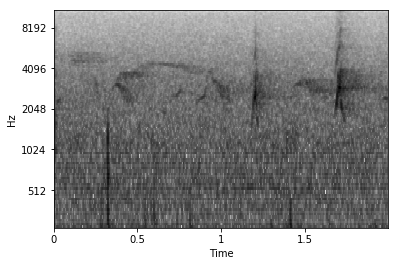

In [24]:
# First example (0->2s) in the TFRecord
feature_extractor.plot(someexamples[0]['data'])

## 1.5 - Check some other TFRecord

In [25]:
someothertfrecord = os.path.join(
    sometfrecord_path,
    random.sample(os.listdir(sometfrecord_path), 1)[0]
)
print(someothertfrecord)

/home/jul/data/birdclef2019/custom_subsets/subset_1562856852/features/audio_wav_22050hz/grcfly/XC142435.tf


### As examples

In [26]:
otherexamples = tf_utils.tfrecord2example(someothertfrecord, feature_extractor)

In [27]:
print(otherexamples)

[{'data': array([[-18.420681 , -18.420681 , -18.40097  , ...,  -5.9411745,
         -6.835805 ,  -6.000492 ],
       [-18.420681 , -18.420681 , -18.406239 , ...,  -6.2548556,
         -7.149484 ,  -6.314173 ],
       [-18.420681 , -18.420681 , -18.401499 , ...,  -5.623309 ,
         -5.4240413,  -6.6480875],
       ...,
       [-18.420681 , -18.420681 , -18.418854 , ..., -16.678776 ,
        -15.918623 , -15.981981 ],
       [-18.420681 , -18.420681 , -18.416958 , ..., -16.428207 ,
        -16.475487 , -16.11432  ],
       [-18.420681 , -18.420681 , -18.418795 , ..., -16.055838 ,
        -16.738276 , -16.93626  ]], dtype=float32), 'filename': b'audio_wav_22050hz/grcfly/XC142435.tf', 'labels': b'252', 'times': array([0.      , 1.996916], dtype=float32)}, {'data': array([[ -5.830224 ,  -5.7531075,  -5.2927723, ...,  -5.74775  ,
         -6.2315664,  -6.8378787],
       [ -6.1439056,  -6.066789 ,  -5.606454 , ...,  -6.0614314,
         -6.545247 ,  -7.151558 ],
       [-10.765396 ,  -7.54

### As input (features + one-hot encoded labels) to the model

In [28]:
subset_class_list = sorted(list(subset_label_set)) # labels are one-hot encoded according to this list

In [29]:
print(subset_class_list)

[118, 193, 202, 252, 297, 311, 382, 487, 509, 536]


In [30]:
example_as_input = tf_utils.tfrecord2data(someothertfrecord, feature_extractor, subset_class_list)

W0711 17:03:19.135631 140116637255488 deprecation.py:323] From /home/jul/dev/phaunos_ml/phaunos_ml/utils/tf_utils.py:143: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [31]:
# model_input is a list of tuple (<features>, <one-hot encoded labels>)
print(example_as_input)

[(array([[[-18.420681 , -18.420681 , -18.40097  , ...,  -5.9411745,
          -6.835805 ,  -6.000492 ],
        [-18.420681 , -18.420681 , -18.406239 , ...,  -6.2548556,
          -7.149484 ,  -6.314173 ],
        [-18.420681 , -18.420681 , -18.401499 , ...,  -5.623309 ,
          -5.4240413,  -6.6480875],
        ...,
        [-18.420681 , -18.420681 , -18.418854 , ..., -16.678776 ,
         -15.918623 , -15.981981 ],
        [-18.420681 , -18.420681 , -18.416958 , ..., -16.428207 ,
         -16.475487 , -16.11432  ],
        [-18.420681 , -18.420681 , -18.418795 , ..., -16.055838 ,
         -16.738276 , -16.93626  ]]], dtype=float32), array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)), (array([[[ -5.830224 ,  -5.7531075,  -5.2927723, ...,  -5.74775  ,
          -6.2315664,  -6.8378787],
        [ -6.1439056,  -6.066789 ,  -5.606454 , ...,  -6.0614314,
          -6.545247 ,  -7.151558 ],
        [-10.765396 ,  -7.5411763, -13.017558 , ...,  -8.425922 ,
          -8.979229

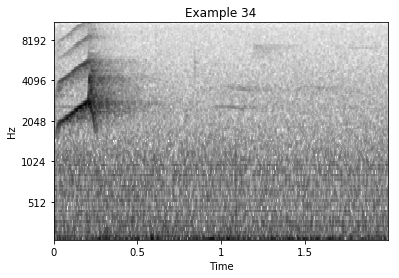

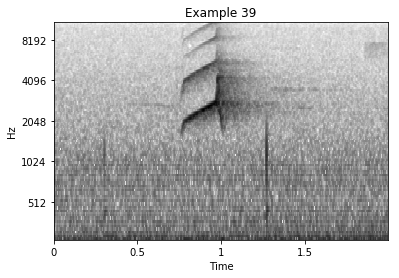

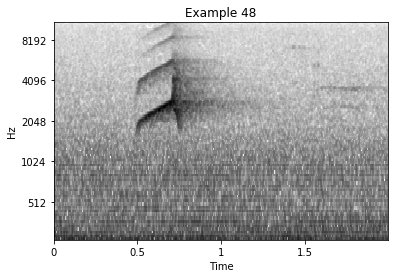

In [32]:
# Plot features for random examples from the selected file
ind = sorted(random.sample(range(len(example_as_input)),min(len(example_as_input), 3)))
for i in ind:    
    plt.figure()
    feature_extractor.plot(example_as_input[i][0][0])
    plt.title(f'Example {i}')

# 2 - Training

## 2.1 - Generate a train/valid split to monitor the performance on unseen data

In [33]:
from phaunos_ml.utils.dataset_utils import split_dataset

In [34]:
# This generates 2 files,
# /subset/path/subset_name.train.csv containing 80% of the data (training dataset)
# /subset/path/subset_name.test.csv containing 20% of the data (validation dataset, to select the model)
split_dataset(subset_filename, test_size=0.2)

/home/jul/data/birdclef2019/custom_subsets/subset_1562856852/subset_1562856852.train.csv written
/home/jul/data/birdclef2019/custom_subsets/subset_1562856852/subset_1562856852.test.csv written


In [35]:
subset_filename

'/home/jul/data/birdclef2019/custom_subsets/subset_1562856852/subset_1562856852.csv'

## 2.2 - Count the number of batches in the train and valid sets

In [36]:
from phaunos_ml.utils.dataset_utils import dataset_stat_per_example
BATCH_SIZE = 32

In [37]:
# training set
n_train_batches, n_train_examples_per_class = dataset_stat_per_example(
    subset_filename.replace('.csv', '.train.csv'),
    os.path.join(os.path.dirname(subset_filename), 'features'),
    feature_extractor.feature_shape,
    subset_class_list,
    batch_size=BATCH_SIZE)
print(f'Num training batches: {n_train_batches} (i.e. {n_train_batches * BATCH_SIZE} examples)')
for c, n in zip(subset_class_list, n_train_examples_per_class):
    print(f'Class {c:2}: {n} examples')

Num training batches: 1104 (i.e. 35328 examples)
Class 118: 8891 examples
Class 193: 3098 examples
Class 202: 1185 examples
Class 252: 4400 examples
Class 297: 3274 examples
Class 311: 1428 examples
Class 382: 2286 examples
Class 487: 4975 examples
Class 509: 2903 examples
Class 536: 2888 examples


In [38]:
# valid set
n_valid_batches, n_valid_examples_per_class = dataset_stat_per_example(
    subset_filename.replace('.csv', '.test.csv'),
    os.path.join(os.path.dirname(subset_filename), 'features'),
    feature_extractor.feature_shape,
    subset_class_list,
    batch_size=BATCH_SIZE)
print(f'Num valid batches: {n_valid_batches} (i.e. {n_valid_batches * BATCH_SIZE} examples)')
for c, n in zip(subset_class_list, n_valid_examples_per_class):
    print(f'Class {c:2}: {n} examples')

Num valid batches: 338 (i.e. 10816 examples)
Class 118: 2501 examples
Class 193: 1353 examples
Class 202: 67 examples
Class 252: 1092 examples
Class 297: 899 examples
Class 311: 755 examples
Class 382: 792 examples
Class 487: 1888 examples
Class 509: 722 examples
Class 536: 747 examples


## 2.3 - Write feature extraction and training config files

In [39]:
import json
import pathlib

EPOCHS = 10

In [40]:
# Write feature extractor's config file
feature_extractor.config2file(os.path.join(subset_dir, 'features', 'featex_config.json'))

In [41]:
# Write training config file

training_dir = os.path.join(subset_dir, 'training')

training_config = {}
training_config['feature_path'] = os.path.join(subset_dir, 'features')
training_config['train_set_file'] = subset_filename.replace('.csv', '.train.csv')
training_config['n_train_batches'] = n_train_batches
training_config['batch_size'] = BATCH_SIZE
training_config['multilabel'] = False
training_config['epochs'] = EPOCHS
training_config['metrics'] = 'accuracy'
training_config['out_dir'] = training_dir
training_config['valid_set_file'] = subset_filename.replace('.csv', '.test.csv')
training_config['n_valid_batches'] = n_valid_batches

training_config_path = os.path.join(training_dir, 'training_config.json')
pathlib.Path(training_dir).mkdir(parents=True, exist_ok=True)

with open(training_config_path, 'w') as training_config_file:
    json.dump(training_config, training_config_file)

## 2.4 - Train

In [42]:
from phaunos_ml import train

In [43]:
train.process(training_config_path)

W0711 17:05:03.306349 140116637255488 deprecation.py:506] From /home/jul/.miniconda3/envs/phaunos_ml/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mels (InputLayer)            [(32, 1, 128, 344)]       0         
_________________________________________________________________
l1_conv (Conv2D)             (32, 32, 126, 342)        288       
_________________________________________________________________
l1_bn (BatchNormalization)   (32, 32, 126, 342)        96        
_________________________________________________________________
l1 (Activation)              (32, 32, 126, 342)        0         
_________________________________________________________________
l1_mp (MaxPooling2D)         (32, 32, 62, 170)         0         
_________________________________________________________________
l2_conv (Conv2D)             (32, 32, 58, 166)         25600     
_________________________________________________________________
l2_bn (BatchNormalization)   (32, 32, 58, 166)         96    